Questions to Showcase Your Data Skills for a Movie Project:
Exploratory Data Analysis (EDA):

What are the top genres based on revenue and popularity?
How do movie ratings (vote_average) correlate with revenue (revenue_musd)?
What is the distribution of movie revenues across different genres, release years, or directors?
How does the popularity of movies change over time (e.g., by release year)?
Time-based Analysis:

How have movie revenues changed over the years (e.g., year-over-year trends)?
What is the average vote rating for movies over time? Does it change with popular genres?
How does the box office performance differ across seasons or months?
Sentiment and Review Analysis:

What is the relationship between movie popularity and user ratings?
Are there any significant differences in revenue between movies with high vs. low vote averages?
Does the director or actor influence movie revenue?
Comparative and Ranking Analysis:

Which director has the highest average revenue per movie?
What are the top 10 movies based on revenue and popularity?
Which actors, directors, or franchises consistently produce the highest-grossing movies?
Geographical Analysis:

What are the top countries by movie revenues or popularity?
How do movie revenues vary by country or region (using geographical visualizations)?
Can we visualize movies' performances across different countries and continents?
Revenue vs. Other Variables:

How does the release year affect movie revenue?
Is there a relationship between a movie's budget (if available) and its revenue?
Does a higher budget correlate with higher revenue, or do lower-budget films sometimes outperform?
Genre and Popularity:

How does movie genre correlate with box office success?
Which genre has the highest average revenue per movie?
How does the popularity of certain genres evolve over time?
Clustering and Grouping:
Can you group movies into clusters based on revenue, popularity, and vote average?
Which movies are outliers in terms of revenue or popularity?
Can you identify patterns of movie success based on genre, director, or year?

Multivariate Analysis:

Create a multi-dimensional visualization (e.g., scatter plot matrix) to show how different features (e.g., revenue, popularity, vote average, release year) interact.
How do multiple variables (e.g., director, genre, year) influence the success of movies?
Advanced Visualizations:

Use heatmaps to show correlations between different numerical variables like revenue_musd, vote_average, and popularity.
Build interactive dashboards that allow users to filter and explore different attributes of movies.

# Importing data and libraries

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', None)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import streamlit as st
import plotly.express as px
import altair as alt

In [12]:
df = pd.read_csv("movies_complete.csv", parse_dates= ["release_date"]) # release_date column was not correct dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

## Information about the Features:
* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [15]:
df['genres']

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
44686                Drama|Family
44687                       Drama
44688       Action|Drama|Thriller
44689                         NaN
44690                         NaN
Name: genres, Length: 44691, dtype: object

In [18]:
(df['genres'].str.split("|"))

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
44686                 [Drama, Family]
44687                         [Drama]
44688       [Action, Drama, Thriller]
44689                             NaN
44690                             NaN
Name: genres, Length: 44691, dtype: object

In [23]:
df['poster_path']

0        <img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>
1        <img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>
2        <img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>
3        <img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>
4        <img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>
                                                       ...                                                
44686    <img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>
44687    <img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>
44688    <img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>
44689    <img src='http://image.tmdb.

In [4]:
df.describe(include = "object")
df.describe()
df[df['title']  ==  'Cinderella']

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


,id,release_date,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.000000,44657,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000
mean,107186.242845,1992-04-28 16:30:02.539355520,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643
min,2.000000,1874-12-09 00:00:00,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26033.500000,1978-08-12 00:00:00,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000
50%,59110.000000,2001-08-16 00:00:00,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000
75%,154251.000000,2010-12-10 00:00:00,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000
max,469172.000000,2017-12-27 00:00:00,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000
std,111806.362236,NaN,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.9,263.591415,RKO Radio Pictures|Walt Disney Productions,...,6.8,14.436858,74.0,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,...,6.1,2.102013,88.0,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,...,5.4,0.361288,52.0,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,...,6.0,2.154873,48.0,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,...,5.3,0.987462,180.0,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.0,543.514353,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,...,6.7,19.801128,105.0,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,...,4.8,0.486073,80.0,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,...,5.9,0.209552,77.0,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,...,5.6,1.085134,90.0,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,...,5.5,1.301063,5.0,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


In [5]:
# Looking at missing values
missing_columns = df.isna().sum()
missing_columns[missing_columns > 0]

tagline                  24407
release_date                34
genres                    2105
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_average              2614
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
director                   731
dtype: int64

In [6]:
df['cast'][0]
df['director'][0]
df['belongs_to_collection'][0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

'John Lasseter'

'Toy Story Collection'

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'budget_musd'}>],
       [<Axes: title={'center': 'revenue_musd'}>,
        <Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'cast_size'}>],
       [<Axes: title={'center': 'crew_size'}>, <Axes: >, <Axes: >]],
      dtype=object)

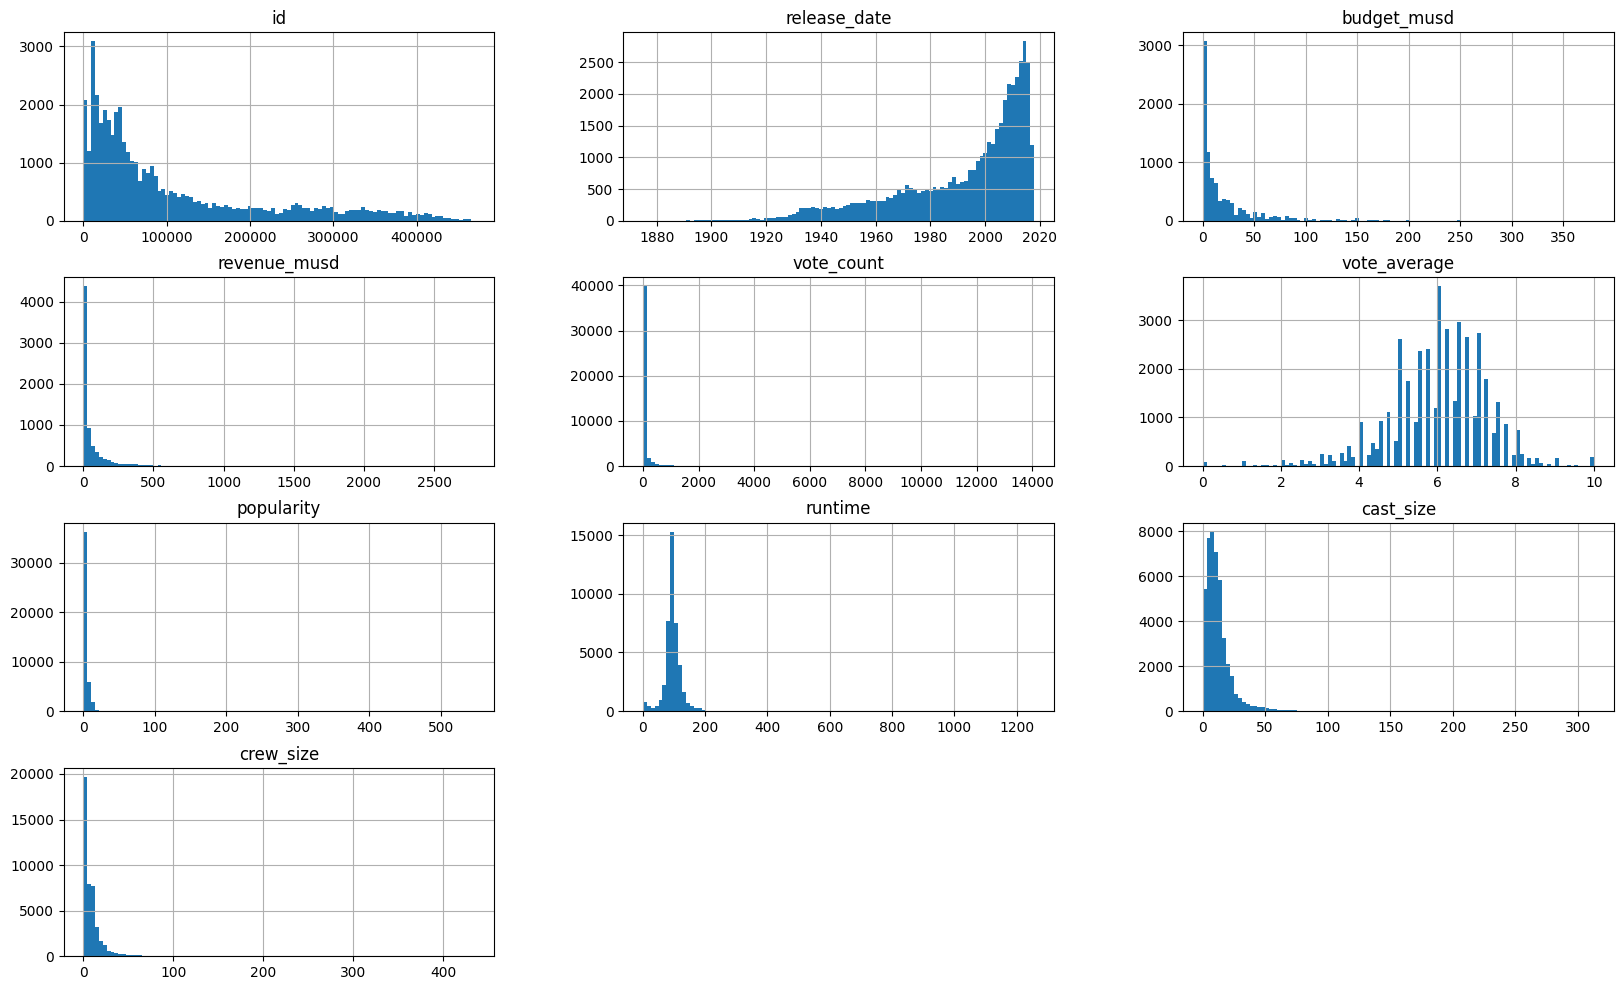

In [7]:
df.hist(figsize = (20,12), bins=100)
plt.show()

In [8]:
df['budget_musd'].value_counts(dropna=False).head(10)
df['revenue_musd'].value_counts(dropna=False).head(10)

budget_musd
NaN     35837
5.0       286
10.0      258
20.0      243
2.0       241
15.0      226
3.0       220
25.0      206
1.0       195
30.0      189
Name: count, dtype: int64

revenue_musd
NaN          37306
12.000000       20
10.000000       19
11.000000       19
2.000000        18
6.000000        17
5.000000        14
0.500000        13
8.000000        13
0.000001        12
Name: count, dtype: int64

# Looking at the best and the worst movies
Using `poster_path`, `title`, `budget_musd`, `revenue_musd`, `vote_count`, `vote_average,` `popularity`

In [9]:
# Create subset
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity"]].copy()
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519
...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,NaN,NaN,1.0,4.0,0.072051
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.0,9.0,0.178241
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,NaN,NaN,6.0,3.8,0.903007
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.0,NaN,0.003503


In [10]:
# Creating new columns on subset
df_best['profit_musd'] = df_best['revenue_musd'] - df_best['budget_musd']
df_best['return'] = df_best['revenue_musd'] / df_best['budget_musd']

df_best.head(5)

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


In [11]:
# Changing Column Labels for Data Presentation
df_best_columns = ["URL", "Title", "Budget", "Revenue", "Votes", "Average Rating", "Popularity", "Profit", "ROI"]
df_best.columns = df_best_columns

In [12]:
df_best.head()
df_best.set_index("Title", inplace=True)
df_best.head()

,URL,Title,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


,URL,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


In [13]:
df_best.iloc[0]

URL               <img src='http://image.tmdb.org/t/p/w185//uXDf...
Budget                                                         30.0
Revenue                                                  373.554033
Votes                                                        5415.0
Average Rating                                                  7.7
Popularity                                                21.946943
Profit                                                   343.554033
ROI                                                       12.451801
Name: Toy Story, dtype: object

In [14]:
# Looking at images in codebook...
test = df_best.iloc[:3, :2]
test
HTML(test.to_html(escape=False))

,URL,Budget
Title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN


,URL,Budget
Title,,
Toy Story,,30.0
Jumanji,,65.0
Grumpier Old Men,,NaN


In [15]:
# We want moviees with at least some budget

## 5 million budget
df_best[df_best['Budget'] >= 5].sort_values(by= "ROI", ascending=False)

# Filling in missing values

df_best['Budget'] = df_best['Budget'].fillna(0)
df_best['Votes'] = df_best['Votes'].fillna(0)

,URL,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.500000,792.965326,3359.0,7.3,19.358546,782.465326,75.520507
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.000000,368.744044,686.0,6.2,6.719949,363.744044,73.748809
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.000000,775.398007,6778.0,8.1,42.149697,764.398007,70.490728
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.000000,470.654000,2628.0,7.5,19.726114,463.654000,67.236286
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.000000,328.203506,512.0,6.3,7.791212,323.203506,65.640701
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjp...,7.500000,NaN,3.0,4.0,0.882188,NaN,NaN
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.000000,NaN,67.0,7.3,9.797505,NaN,NaN
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.402000,NaN,153.0,5.3,5.613875,NaN,NaN


In [16]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   URL             44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 4.1+ MB


In [17]:
# Creating a function that will find best n movies

def best(n, by, ascending=False, min_budget=0, min_votes=0):
    """
    Returns an HTML table of the top `n` movies sorted by a specified column, filtered by budget and votes.

    Parameters:
    `n` (int): The number of top rows to return.
    `by` (str): The column to sort the results by.
    `ascending` (bool, optional): Whether to sort in ascending order. Defaults to False (descending).
    `min_budget` (int, optional): Minimum budget filter. Defaults to 0.
    `min_votes` (int, optional): Minimum votes filter. Defaults to 0.

    """
    df2 = df_best[(df_best['Budget'] >= min_budget) 
                  & (df_best['Votes'] >= min_votes)][["URL", by]].sort_values(by=by, ascending=ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

## Top 5 Movies Highest Revenue

In [18]:
best(5, "Revenue", min_budget=0, min_votes=0)

,URL,Revenue
Title,,
Avatar,,2787.965087
Star Wars: The Force Awakens,,2068.223624
Titanic,,1845.034188
The Avengers,,1519.557910
Jurassic World,,1513.528810


## Top 5 Movies Lowest Revenue

In [19]:
best(5, "Revenue", ascending=True,min_budget=0, min_votes=0)

,URL,Revenue
Title,,
Mute Witness,,0.000001
A Cry in the Wild,,0.000001
The Wind in the Willows,,0.000001
Missing,,0.000001
The Letters,,0.000001


## Top 5 Movies Highest Budget

In [20]:
best(5, "Budget", min_budget=0, min_votes=0)

,URL,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.0
Pirates of the Caribbean: At World's End,,300.0
Avengers: Age of Ultron,,280.0
Superman Returns,,270.0
Transformers: The Last Knight,,260.0


## Top 5 Movies Lowest Budget

In [21]:
best(5, "Budget", ascending=True,min_budget=0, min_votes=0)

,URL,Budget
Title,,
Forced to Kill,,0.0
"It's Me, Hilary: The Man Who Drew Eloise",,0.0
The Revengers,,0.0
The Surrealist and His Naughty Hand,,0.0
Sylvia,,0.0


## Top 5 Movies Highest Profit

In [22]:
best(5, "Profit", min_budget=0, min_votes=0)

,URL,Profit
Title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


## Top 5 Movies Lowest Profit

In [23]:
best(5, "Profit", ascending=True,min_budget=0, min_votes=0)

,URL,Profit
Title,,
The Lone Ranger,,-165.710090
The Alamo,,-119.180039
Mars Needs Moms,,-111.007242
Valerian and the City of a Thousand Planets,,-107.447384
The 13th Warrior,,-98.301101


## Top 5 Movies Highest ROI

In [24]:
best(5, "ROI",min_budget=5, min_votes=0)

,URL,ROI
Title,,
E.T. the Extra-Terrestrial,,75.520507
My Big Fat Greek Wedding,,73.748809
Star Wars,,70.490728
Jaws,,67.236286
Crocodile Dundee,,65.640701


## Top 5 Movies Lowest ROI

In [25]:
best(5, "ROI",ascending=True ,min_budget=5, min_votes=0)

,URL,ROI
Title,,
Chasing Liberty,,5.217391e-07
The Cookout,,7.500000e-07
Never Talk to Strangers,,9.375000e-07
Deadfall,,1.800000e-06
In the Cut,,1.916667e-06


## Top 5 Movies Highest Votes

In [26]:
best(5, "Votes",min_budget=0, min_votes=0)

,URL,Votes
Title,,
Inception,,14075.0
The Dark Knight,,12269.0
Avatar,,12114.0
The Avengers,,12000.0
Deadpool,,11444.0


## Top 5 Movies Most Popular

In [27]:
best(5, "Popularity",min_budget=0, min_votes=0)

,URL,Popularity
Title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


# Creating a search

##  Science Fiction Movie

In [28]:
# Look at what genres are available
df['genres'].value_counts()
df['genres'].str.contains("Science Fiction", na=False)  #Nan  Values should be treated as False   
# df[df['genres'].str.contains("Science Fiction", na=False)].head(3)

# Creating the mask
mask = df['genres'].str.contains("Science Fiction", na=False)
# df[mask].head(5)

# Sort by revenue_musd
df[mask][['title','revenue_musd']].sort_values(by = "revenue_musd", ascending=False)


genres
Drama                                       4935
Comedy                                      3581
Documentary                                 2670
Drama|Romance                               1291
Comedy|Drama                                1125
                                            ... 
Crime|Foreign|Thriller                         1
Adventure|Crime|Drama|Western                  1
Animation|Drama|Science Fiction|Thriller       1
Comedy|Romance|Animation|Music                 1
Family|Animation|Romance|Comedy                1
Name: count, Length: 4044, dtype: int64

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

,title,revenue_musd
14448,Avatar,2787.965087
26265,Star Wars: The Force Awakens,2068.223624
17669,The Avengers,1519.557910
24812,Jurassic World,1513.528810
26268,Avengers: Age of Ultron,1405.403694
...,...,...
44594,The Stranger: Summoned by Shadows,NaN
44655,TechnoCalyps,NaN
44656,Starquest II,NaN
44668,The Man with the Rubber Head,NaN


## Science Fiction and Adventure

In [29]:
mask = df['genres'].str.contains("Science Fiction", na=False) & df['genres'].str.contains("Adventure", na=False) 

# Sort by revenue_musd
df[mask][['title','revenue_musd']].sort_values(by = "revenue_musd", ascending=False)

,title,revenue_musd
14448,Avatar,2787.965087
26265,Star Wars: The Force Awakens,2068.223624
17669,The Avengers,1519.557910
24812,Jurassic World,1513.528810
26268,Avengers: Age of Ultron,1405.403694
...,...,...
43745,2012 Doomsday,NaN
43855,Stasis,NaN
44154,Island of Lost Women,NaN
44172,Gor,NaN


## Using actors instead?

In [30]:
df['cast']

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [31]:
mask_actor =  df['cast'].str.contains("Jamie Foxx", na=False)

In [32]:
jamie =  df[mask_actor][['title','revenue_musd','poster_path']].sort_values(by = "revenue_musd", ascending=False)
HTML(jamie.to_html(escape=False))

,title,revenue_musd,poster_path
22937,The Amazing Spider-Man 2,705.717432,
22974,Rio 2,500.188435,
16827,Rio,484.635760,
19857,Django Unchained,425.368238,
42940,Baby Driver,224.511319,
8005,Collateral,217.764291,
14715,Valentine's Day,216.485654,
15931,Due Date,211.780824,
20947,White House Down,205.366737,
11048,Miami Vice,163.794509,


## Using directors

In [33]:
mask_director = df['director'].str.contains("Quentin Tarantino", na=False)

In [34]:
HTML(df[mask_actor & mask_director][['title','poster_path','revenue_musd']].to_html(escape=False))

,title,poster_path,revenue_musd
19857,Django Unchained,,425.368238


In [35]:
HTML(df[mask_director][['title','poster_path','revenue_musd']].sort_values(by='revenue_musd', ascending=False).to_html(escape=False))

,title,poster_path,revenue_musd
19857,Django Unchained,,425.368238
13515,Inglourious Basterds,,319.131050
291,Pulp Fiction,,213.928762
6667,Kill Bill: Vol. 1,,180.949000
27822,The Hateful Eight,,155.760117
7208,Kill Bill: Vol. 2,,152.159461
1628,Jackie Brown,,39.673162
11785,Death Proof,,25.037897
1047,Reservoir Dogs,,14.661007
40605,My Best Friend's Birthday,,NaN


# Using dates

In [36]:
df['release_date'].sort_values(ascending=False)

43576   2017-12-27
41597   2017-11-30
43803   2017-11-17
44250   2017-11-03
41602   2017-10-27
           ...    
43347          NaT
43571          NaT
44053          NaT
44436          NaT
44686          NaT
Name: release_date, Length: 44691, dtype: datetime64[ns]

In [37]:
# Create a mask for release date
mask_date = df['release_date'].between('2010-01-01', '2017-12-31')

In [38]:
HTML(df[mask_date][['title','poster_path','revenue_musd','release_date']].sort_values(by='revenue_musd', ascending=False).head(10).to_html(escape=False))

,title,poster_path,revenue_musd,release_date
26265,Star Wars: The Force Awakens,,2068.223624,2015-12-15
17669,The Avengers,,1519.557910,2012-04-25
24812,Jurassic World,,1513.528810,2015-06-09
28501,Furious 7,,1506.249360,2015-04-01
26268,Avengers: Age of Ultron,,1405.403694,2015-04-22
17294,Harry Potter and the Deathly Hallows: Part 2,,1342.000000,2011-07-07
21876,Frozen,,1274.219009,2013-11-27
41556,Beauty and the Beast,,1262.886337,2017-03-16
42562,The Fate of the Furious,,1238.764765,2017-04-12
20622,Iron Man 3,,1215.439994,2013-04-18


# What are the most common words used in movie titles, taglines and overviews?

In [39]:
from wordcloud import WordCloud

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [41]:
tagline = df['tagline'].dropna()
overview = df['overview'].dropna()
title = df['title'].dropna()

In [42]:
# Create a corpus for the series
columns = ['tagline', 'overview', 'title']
corpus_dict = {}

# Loop through columns
for c in columns:
    series = df[c].dropna()
    corpus_dict[f"{c}_corpus"] = ' '.join(series)
    corpus_dict.keys()

# Show corpus
for k, v in corpus_dict.items():
    print(f"{k} : {v[:100]}...")

dict_keys(['tagline_corpus'])

dict_keys(['tagline_corpus', 'overview_corpus'])

dict_keys(['tagline_corpus', 'overview_corpus', 'title_corpus'])

tagline_corpus : Roll the dice and unleash the excitement! Still Yelling. Still Fighting. Still Ready for Love. Frien...
overview_corpus : Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto ...
title_corpus : Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom an...


<Figure size 1600x800 with 0 Axes>

(-0.5, 3999.5, 1999.5, -0.5)

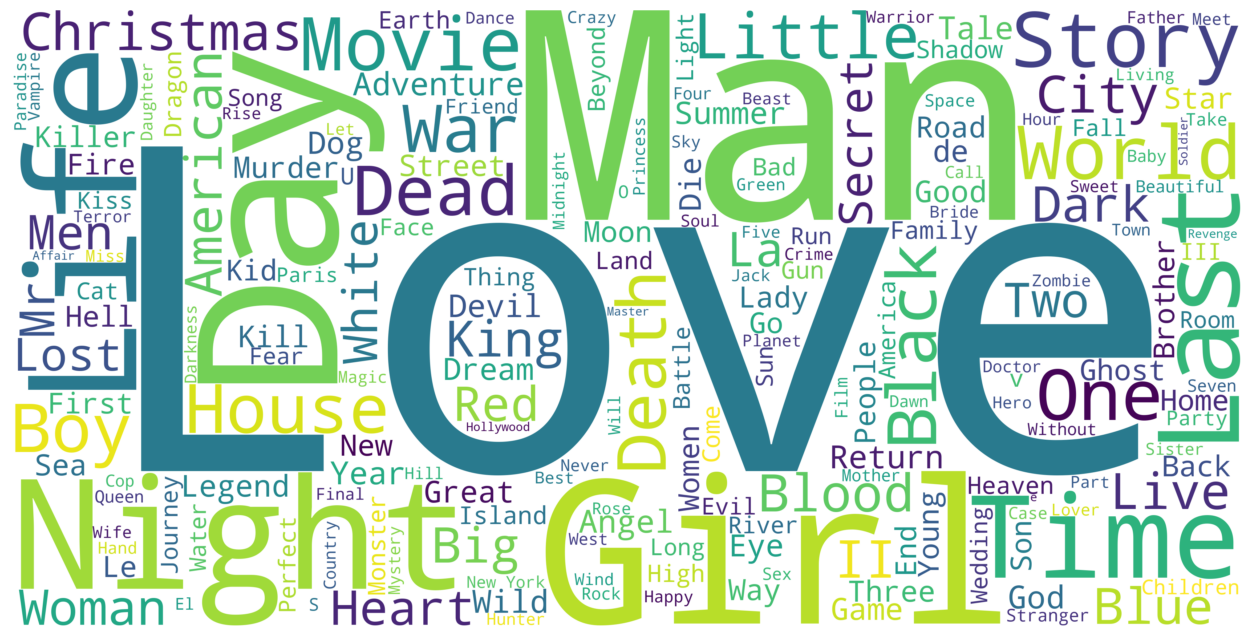

In [43]:
# Create tagline WordCloud
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(corpus_dict['title_corpus'])
title_wordcloud

# Show the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

<Figure size 1600x800 with 0 Axes>

(-0.5, 3999.5, 1999.5, -0.5)

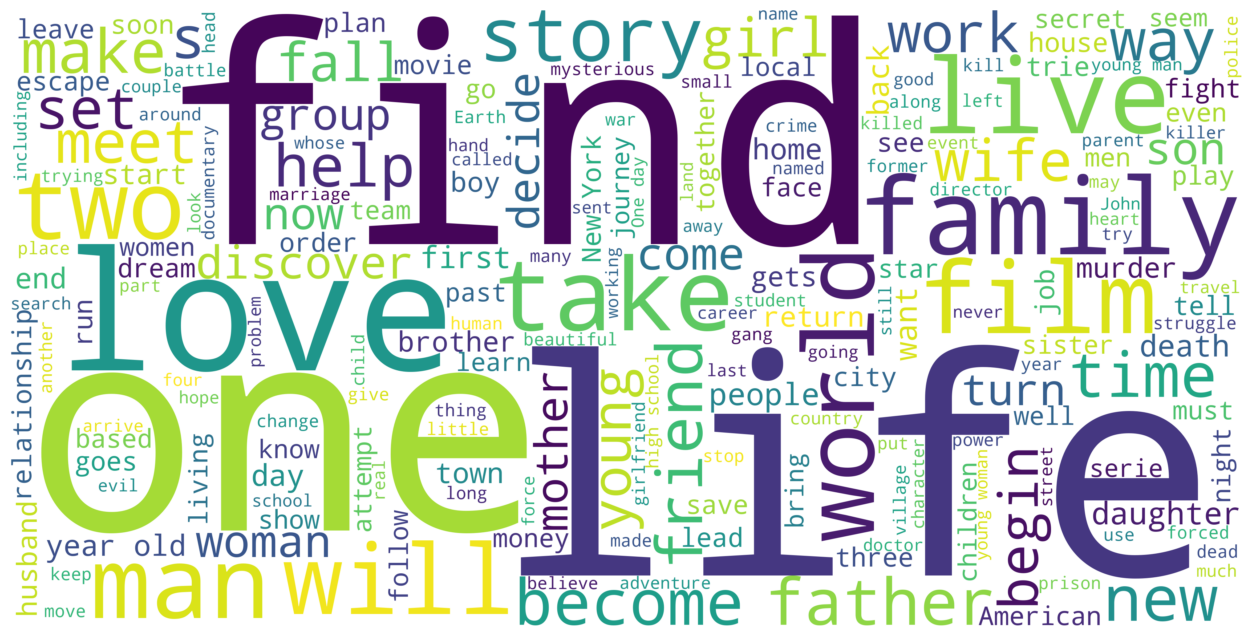

In [44]:
# Create tagline WordCloud
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(corpus_dict['overview_corpus'])
overview_wordcloud

# Show the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

# Are franchises more successful?

In [45]:
df['belongs_to_collection']

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [46]:
# Create a Franchise True / False Column
df['Franchise'] = df['belongs_to_collection'].notna()
df['Franchise'].value_counts()


Franchise
False    40228
True      4463
Name: count, dtype: int64

## Looking at some metrics

In [47]:
df['ROI'] = df['revenue_musd'] / df['budget_musd']

In [48]:
# Revenue
df.groupby(by='Franchise')['revenue_musd'].agg('mean')
df.groupby(by='Franchise')['revenue_musd'].agg('median')

Franchise
False     44.742814
True     165.708193
Name: revenue_musd, dtype: float64

Franchise
False    12.0
True     67.2
Name: revenue_musd, dtype: float64

In [49]:
# ROI
df.groupby(by='Franchise')['ROI'].agg('mean')
df.groupby(by='Franchise')['ROI'].agg('median')

Franchise
False    6966.390650
True      856.404622
Name: ROI, dtype: float64

Franchise
False    1.619699
True     3.709195
Name: ROI, dtype: float64

In [50]:
# Budget
df.groupby(by='Franchise')['budget_musd'].agg('mean')
df.groupby(by='Franchise')['budget_musd'].agg('median')

Franchise
False    18.047741
True     38.319847
Name: budget_musd, dtype: float64

Franchise
False     7.037519
True     16.000000
Name: budget_musd, dtype: float64

In [51]:
# Popularity
df.groupby(by='Franchise')['popularity'].agg('mean')
df.groupby(by='Franchise')['popularity'].agg('median')

Franchise
False    2.592726
True     6.245051
Name: popularity, dtype: float64

Franchise
False    1.037714
True     3.708247
Name: popularity, dtype: float64

In [52]:
# At a glance
df.groupby(by='Franchise').agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.047741,44.742814,6.008787,2.592726,1.619699,78.289550
True,38.319847,165.708193,5.956806,6.245051,3.709195,412.387856


## What are the most successful franchises?

In [54]:
df['belongs_to_collection'].value_counts()

belongs_to_collection
The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: count, Length: 1691, dtype: int64

In [57]:
franchise = df.groupby("belongs_to_collection").agg({"title":"count",
                                         "budget_musd": ["sum", "mean"], 
                                         "revenue_musd": ["sum", "mean"],
                                         "vote_average": "mean", "popularity": "mean",
                                         "ROI":"median", 
                                         "vote_count":"mean"})

In [62]:
franchise.nlargest(5, ('title','count'))

title budget_musd            revenue_musd  \
                              count         sum       mean          sum   
belongs_to_collection                                                     
The Bowery Boys                  29        0.00        NaN     0.000000   
Totò Collection                  27        0.00        NaN     0.000000   
James Bond Collection            26     1539.65  59.217308  7106.970239   
Zatôichi: The Blind Swordsman    26        0.00        NaN     0.000000   
The Carry On Collection          25        0.00        NaN     0.000000   

                                          vote_average popularity       ROI  \
                                     mean         mean       mean    median   
belongs_to_collection                                                         
The Bowery Boys                       NaN     6.675000   0.198006       NaN   
Totò Collection                       NaN     6.837037   1.047324       NaN   
James Bond Collection          273.345009     6.338462  13.453502  6.128922   
Zatôichi: The Blind Swordsman         NaN     6.403846   1.100603       NaN   
The Carry On Collection               NaN     6.168000   3.220430       NaN   

                                vote_count  
                                      mean  
belongs_to_collection                       
The Bowery Boys                   0.724138  
Totò Collection                  18.037037  
James Bond Collection          1284.307692  
Zatôichi: The Blind Swordsman    11.192308  
The Carry On Collection          21.040000

In [63]:
franchise.nlargest(5, ('revenue_musd','sum'))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
Harry Potter Collection                 8     1280.00  160.000000   
Star Wars Collection                    8      854.35  106.793750   
James Bond Collection                  26     1539.65   59.217308   
The Fast and the Furious Collection     8     1009.00  126.125000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   

                                    revenue_musd             vote_average  \
                                             sum        mean         mean   
belongs_to_collection                                                       
Harry Potter Collection              7707.367425  963.420928     7.537500   
Star Wars Collection                 7434.494790  929.311849     7.375000   
James Bond Collection                7106.970239  273.345009     6.338462   
The Fast and the Furious Collection  5125.098793  640.637349     6.662500   
Pirates of the Caribbean Collection  4521.576826  904.315365     6.880000   

                                    popularity       ROI   vote_count  
                                          mean    median         mean  
belongs_to_collection                                                  
Harry Potter Collection              26.253893  6.165086  5983.250000  
Star Wars Collection                 23.410919  8.239637  5430.375000  
James Bond Collection                13.453502  6.128922  1284.307692  
The Fast and the Furious Collection  10.799435  4.942154  3197.000000  
Pirates of the Caribbean Collection  53.972237  3.453009  5016.000000

In [65]:
franchise[franchise[("vote_count", "mean")] >=1000].nlargest(5, ("vote_average", "mean"))

title budget_musd             revenue_musd  \
                                 count         sum        mean          sum   
belongs_to_collection                                                         
The Lord of the Rings Collection     3       266.0   88.666667  2916.544743   
The Godfather Collection             3        73.0   24.333333   429.375314   
Blade Runner Collection              1        28.0   28.000000    33.139618   
The Man With No Name Collection      3         2.0    0.666667    35.500000   
The Dark Knight Collection           3       585.0  195.000000  2463.716216   

                                             vote_average popularity  \
                                        mean         mean       mean   
belongs_to_collection                                                  
The Lord of the Rings Collection  972.181581     8.033333  30.272873   
The Godfather Collection          143.125105     7.966667  31.641307   
Blade Runner Collection            33.139618     7.900000  96.272374   
The Man With No Name Collection    11.833333     7.833333  14.171278   
The Dark Knight Collection        821.238739     7.800000  57.418393   

                                        ROI   vote_count  
                                     median         mean  
belongs_to_collection                                     
The Lord of the Rings Collection  11.725157  8253.000000  
The Godfather Collection           3.657142  3677.000000  
Blade Runner Collection            1.183558  3833.000000  
The Man With No Name Collection   25.000000  1422.666667  
The Dark Knight Collection         4.339756  9681.000000

# Most successful directors

In [67]:
df['director'].value_counts()

director
John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
                    ..
Jason Osder          1
John Alan Simon      1
Jennifer Kent        1
Hiroshi Ando         1
Daisy Asquith        1
Name: count, Length: 17349, dtype: int64

<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='director'>

Text(0.5, 1.0, 'Most Active Directors')

Text(0.5, 0, 'Number of Movies')

Text(0, 0.5, 'Director')

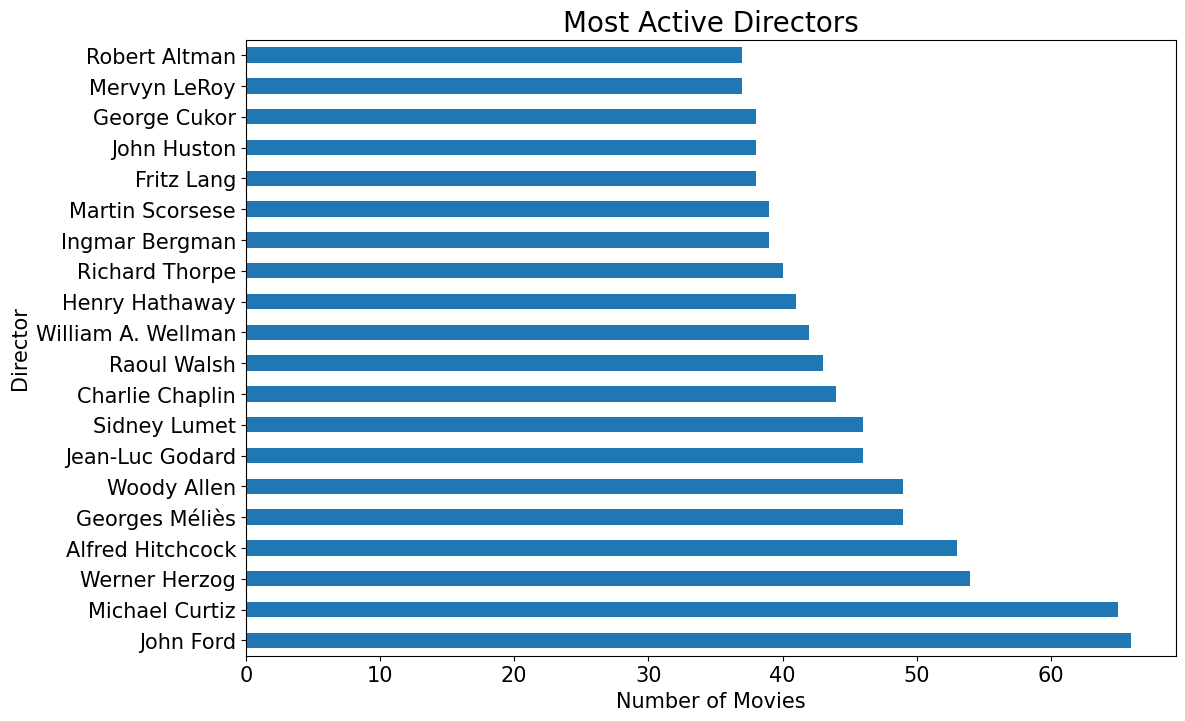

In [70]:
plt.figure(figsize = (12, 8))
df['director'].value_counts().head(20).plot(kind='barh', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.xlabel("Number of Movies", fontsize = 15)
plt.ylabel("Director", fontsize = 15)
plt.show()

In [74]:
df.groupby(by='director')['revenue_musd'].sum().nlargest(5)

director
Steven Spielberg    9256.621422
Peter Jackson       6528.244659
Michael Bay         6437.466781
James Cameron       5900.610310
David Yates         5334.563196
Name: revenue_musd, dtype: float64

<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='director'>

Text(0.5, 1.0, 'Total Revenue')

Text(0.5, 0, 'Revenue (MUSD)')

Text(0, 0.5, 'Director')

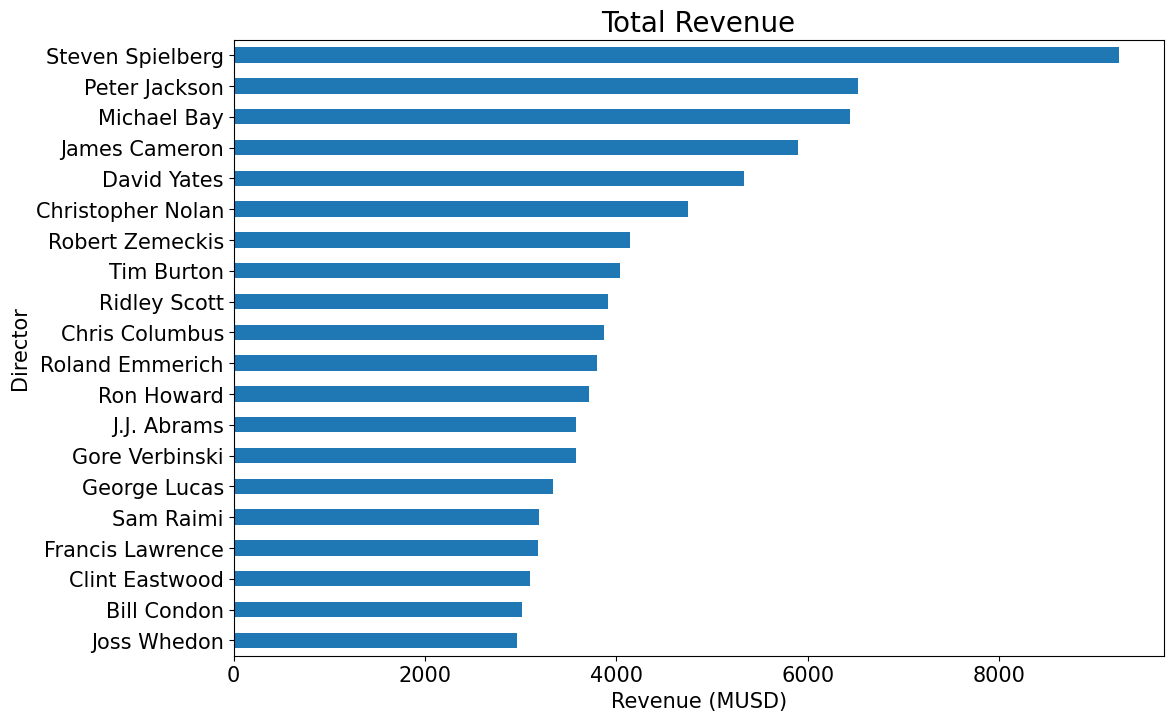

In [77]:
plt.figure(figsize = (12, 8))
df.groupby(by='director')['revenue_musd'].sum().nlargest(20).sort_values(ascending=True).plot(kind='barh', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.xlabel("Revenue (MUSD)", fontsize = 15)
plt.ylabel("Director", fontsize = 15)
plt.show()

In [79]:
directors = df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.0,4.0
Davide Manuli,1,6.9,10.0
E.W. Swackhamer,1,5.9,5.0
Vitaliy Vorobyov,1,5.5,3.0
Yeon Sang-Ho,4,6.6,1039.0
...,...,...,...
Ярополк Лапшин,1,10.0,1.0
پیمان معادی,1,6.0,2.0
塩谷 直義,1,7.2,40.0


In [80]:
directors[(directors['vote_count'] >= 10000) & (directors['title'] >= 10)].nlargest(20, "vote_average")

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.700000,14700.0
Christopher Nolan,11,7.618182,67344.0
Quentin Tarantino,10,7.490000,45910.0
Wes Anderson,10,7.370000,11743.0
David Fincher,10,7.350000,37588.0
Martin Scorsese,39,7.218421,35541.0
Peter Jackson,13,7.138462,47571.0
Joel Coen,17,7.023529,18139.0
James Cameron,11,6.927273,33736.0


In [81]:
df['genres'] = df['genres'].astype(str)

In [88]:
df[df['genres'].str.contains("Horror")].groupby("director")['revenue_musd'].sum().nlargest(10)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Name: revenue_musd, dtype: float64

# Most Successful Actors

In [89]:
df['cast']

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [93]:
df.set_index("id",inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, 862 to 461257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  44691 non-null  object        
 1   tagline                20284 non-null  object        
 2   release_date           44657 non-null  datetime64[ns]
 3   genres                 44691 non-null  object        
 4   belongs_to_collection  4463 non-null   object        
 5   original_language      44681 non-null  object        
 6   budget_musd            8854 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33356 non-null  object        
 9   production_countries   38835 non-null  object        
 10  vote_count             44691 non-null  float64       
 11  vote_average           42077 non-null  float64       
 12  popularity             44691 non-null  float64       
 13  run

In [97]:
df['cast'].str.split("|", expand=True)
actors = df['cast'].str.split("|", expand=True)

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,...,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,...,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,...,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,...,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,...,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,...,None,None,None,None,None,None,None,None,None,None


In [107]:
actors.stack()
actors.stack().reset_index(level=0)
actors.stack().reset_index(level=1)

id       
862     0            Tom Hanks
        1            Tim Allen
        2          Don Rickles
        3           Jim Varney
        4        Wallace Shawn
                   ...        
227506  0     Iwan Mosschuchin
        1    Nathalie Lissenko
        2         Pavel Pavlov
        3    Aleksandr Chabrov
        4          Vera Orlova
Length: 557703, dtype: object

,id,0
0,862,Tom Hanks
1,862,Tim Allen
2,862,Don Rickles
3,862,Jim Varney
4,862,Wallace Shawn
...,...,...
0,227506,Iwan Mosschuchin
1,227506,Nathalie Lissenko
2,227506,Pavel Pavlov
3,227506,Aleksandr Chabrov


,level_1,0
id,,
862,0,Tom Hanks
862,1,Tim Allen
862,2,Don Rickles
862,3,Jim Varney
862,4,Wallace Shawn
...,...,...
227506,0,Iwan Mosschuchin
227506,1,Nathalie Lissenko
227506,2,Pavel Pavlov


In [110]:
actors = actors.stack().reset_index(level=1, drop=True).to_frame()
actors

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [112]:
actors.columns = ['Actor']
actors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557703 entries, 862 to 227506
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Actor   557703 non-null  object
dtypes: object(1)
memory usage: 8.5+ MB


In [113]:
actors = actors.merge(
    df[["title", "revenue_musd", "vote_average", "popularity"]],
    how = "left", left_index=True, right_index=True
)

In [114]:
actors

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
862,Tom Hanks,Toy Story,373.554033,7.7,21.946943
862,Tim Allen,Toy Story,373.554033,7.7,21.946943
862,Don Rickles,Toy Story,373.554033,7.7,21.946943
862,Jim Varney,Toy Story,373.554033,7.7,21.946943
862,Wallace Shawn,Toy Story,373.554033,7.7,21.946943
...,...,...,...,...,...
227506,Iwan Mosschuchin,Satan Triumphant,NaN,NaN,0.003503
227506,Nathalie Lissenko,Satan Triumphant,NaN,NaN,0.003503
227506,Pavel Pavlov,Satan Triumphant,NaN,NaN,0.003503


In [117]:
actors['Actor'].value_counts()

Actor
Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
                    ... 
Gerd Andersson         1
Jacob Torres           1
Olalla Escribano       1
Pepo Suevos            1
Aleksandr Chabrov      1
Name: count, Length: 201501, dtype: int64

<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='Actor'>

Text(0.5, 1.0, 'Most Active Actors')

Text(0.5, 0, 'Number of Movies')

Text(0, 0.5, 'Actor')

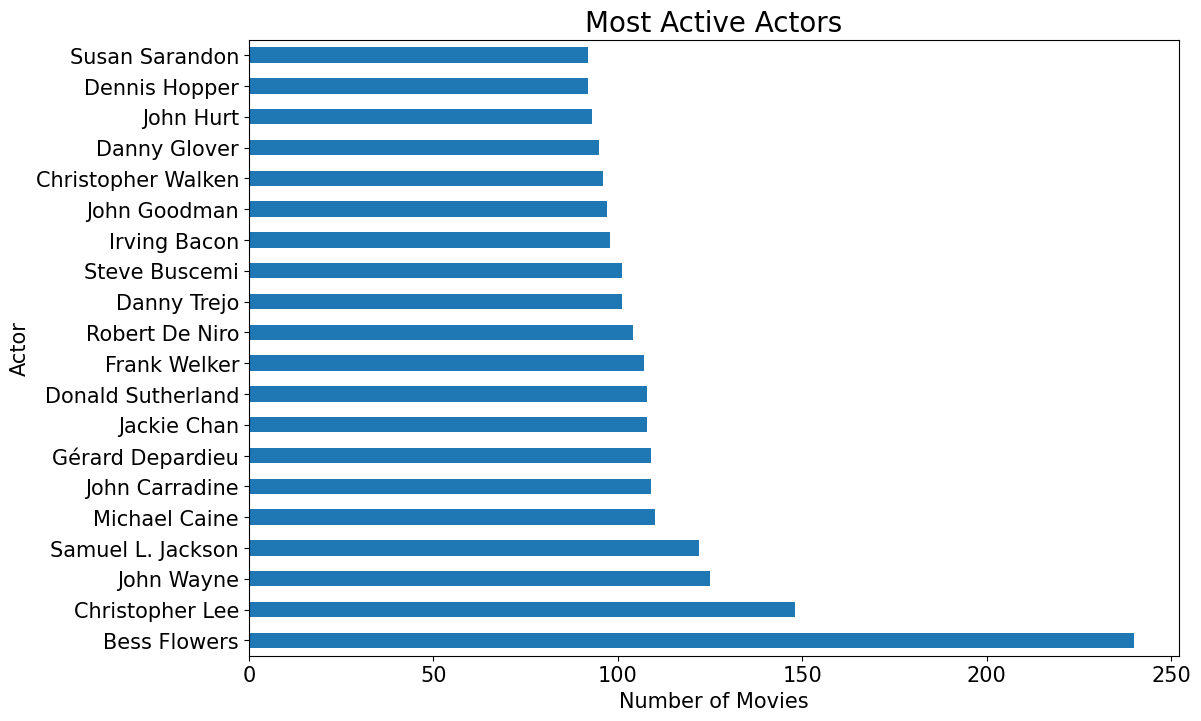

In [123]:
plt.figure(figsize = (12, 8))

actors['Actor'].value_counts(ascending=False).head(20).plot(kind='barh', fontsize=15)
plt.title("Most Active Actors",fontsize = 20)

plt.xlabel("Number of Movies", fontsize=15)
plt.ylabel("Actor", fontsize=15)
plt.show()

In [124]:
agg = actors.groupby("Actor").agg(Total_Revenue = ("revenue_musd", "sum"), 
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"), 
                               Mean_Pop = ("popularity", "mean"), 
                               Total_Movies = ("Actor", "count"))

In [126]:
agg.nlargest(10, "Total_Movies")
agg.nlargest(10, "Total_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Bess Flowers,368.913259,14.756530,6.184186,2.030528,240
Christopher Lee,9417.047887,324.725789,5.910204,4.749606,148
John Wayne,236.094000,11.242571,5.712097,3.092939,125
Samuel L. Jackson,17109.620672,213.870258,6.266116,11.703945,122
Michael Caine,8053.404838,191.747734,6.269444,8.265272,110
Gérard Depardieu,1247.608953,95.969919,6.053211,3.703836,109
John Carradine,255.839586,19.679968,5.546667,2.434950,109
Donald Sutherland,5390.766679,138.224787,6.233962,7.003230,108
Jackie Chan,4699.185933,146.849560,6.275701,5.862638,108


,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Stan Lee,19414.957555,647.165252,6.513043,29.936175,48
Samuel L. Jackson,17109.620672,213.870258,6.266116,11.703945,122
Warwick Davis,13256.032188,662.801609,6.294118,13.088614,34
Frank Welker,13044.152470,326.103812,6.310377,9.571404,107
John Ratzenberger,12596.126073,449.861645,6.484444,10.959477,46
Jess Harnell,12234.608163,611.730408,6.435294,10.919015,35
Hugo Weaving,11027.578473,459.482436,6.473684,10.967890,40
Ian McKellen,11015.592318,478.938796,6.353488,15.447180,44
Johnny Depp,10653.760641,217.423687,6.440580,12.378196,69


<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='Actor'>

Text(0.5, 1.0, 'Total Revenue')

Text(0.5, 0, 'Revenue (in MUSD)')

Text(0, 0.5, 'Actor')

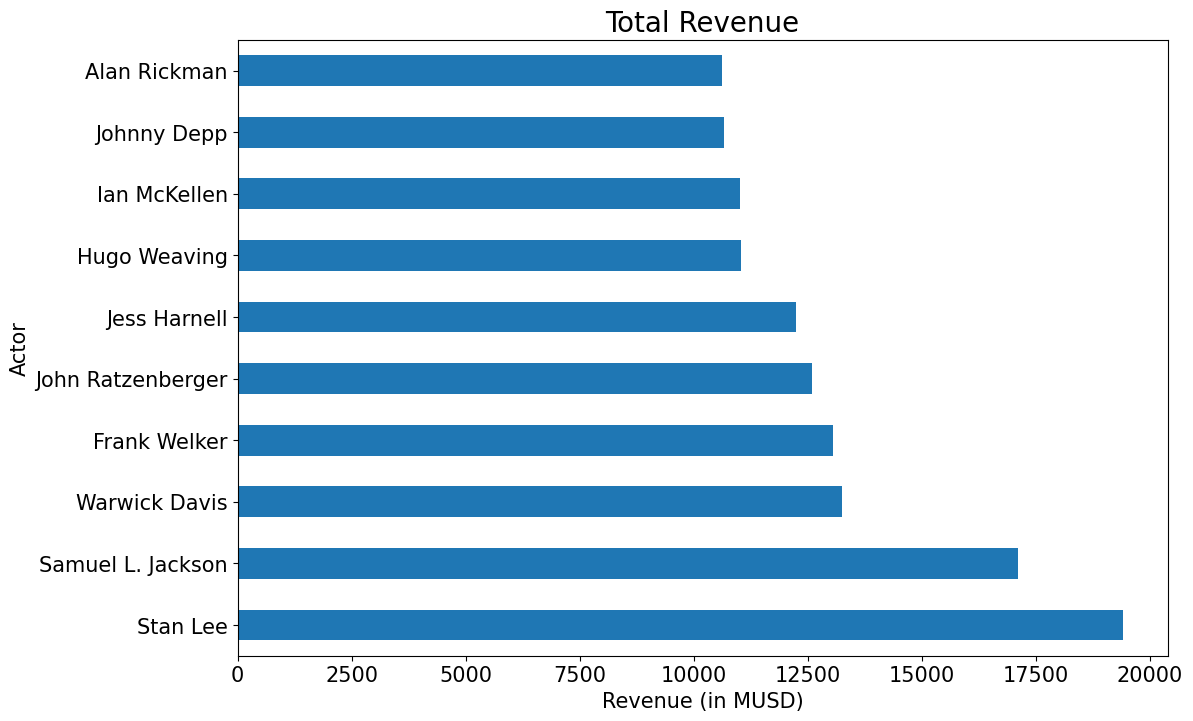

In [129]:
plt.figure(figsize = (12, 8))
agg['Total_Revenue'].nlargest(10).plot(kind='barh', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.xlabel("Revenue (in MUSD)", fontsize = 15)
plt.ylabel("Actor", fontsize=15)
plt.show()

In [130]:
agg[agg['Total_Movies'] >= 10].nlargest(10, "Mean_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Gloria Stuart,1845.034188,1845.034188,6.368750,3.477432,18
Keith Richards,2967.713802,989.237934,6.463636,5.032988,23
Zoë Wanamaker,976.475550,976.475550,6.330000,6.819019,10
James Cameron,1862.075059,931.037530,7.063636,4.691718,12
Matthew Lewis,7915.312500,879.479167,7.372727,23.097479,11
Luke de Woolfson,1720.671036,860.335518,5.718182,8.767206,11
Yuri Lowenthal,1708.162716,854.081358,6.188235,19.884649,17
Dominic Monaghan,3289.607607,822.401902,6.045455,10.621675,11
Philip Ng,821.708551,821.708551,5.920000,6.353320,10


In [131]:
agg[agg['Total_Movies'] >= 10].nlargest(10, "Mean_Rating")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Masao Hayama,0.000000,NaN,8.840000,0.319471,10
David Attenborough,0.000000,NaN,8.270000,2.147383,11
Emil Jannings,0.000000,NaN,7.780000,1.700761,10
Halit Akçatepe,0.214600,0.214600,7.780000,0.741727,10
Yo Oizumi,511.210189,102.242038,7.723077,7.512642,13
Şener Şen,11.074013,3.691338,7.693333,0.912165,16
Ayşen Gruda,0.912800,0.456400,7.677778,0.743196,10
Akira Tani,0.327081,0.163541,7.654545,5.041536,12
Joseph Oliveira,3543.443905,354.344391,7.640000,34.449774,10
